In [30]:
# import the required libraries
import os
import re
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set variables for the project (i.e. the input location of the file to be processed and the output location) )

folderlink = '..//data//'
folder_input = 'input//'
folder_output = 'output//'
input_file_parent = folderlink+folder_output+"parent_data.csv"
input_stcn = folderlink+folder_output+"stcn_q8.csv"

In [3]:
# Panda settings for showing data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
stcn_authors = pd.read_csv(input_stcn, sep=';', encoding='utf-8')

In [5]:
stcn_authors.head()

,title_id,title,author_id,author,author_deathDate,author_birthDate,author_familyName,author_givenName
0,http://data.bibliotheken.nl/doc/nbt/p822561360,"Bedenckingen, over het uytleggen en vergrooten der stadt Haarlem.",nodeID://b265836019,Sa. de Bray,1664,1597,de Bray,Salomon
1,http://data.bibliotheken.nl/doc/nbt/p822560364,"Samuelis Maresii, responsi & judicii sui theologici, de canonicis Ultraiectinis, vindiciæ necessariæ, adversus D. Andreæ Essenii, operosam & directam illius impugnationem",nodeID://b265836010,Samuel Maresius,1673,1599,Maresius,Samuel
2,http://data.bibliotheken.nl/doc/nbt/p822568411,"Refutatio fabulæ præ-adamiticæ, absoluta septem primariis quæstionibus.",nodeID://b265836034,Samuel Maresius,1673,1599,Maresius,Samuel
3,http://data.bibliotheken.nl/doc/nbt/p822566710,Judicium et responsum theologicum [...] ad quæstionem [...] de canonicis Ultraiectinis qui reformatam religionem profitentur.,nodeID://b265836031,Samuel Maresius,1673,1599,Maresius,Samuel
4,http://data.bibliotheken.nl/doc/nbt/p822517825,Oratio inauguralis pro scholis.,nodeID://b265835974,Joannes Grevius,1624?,1584,Grevius,Joannes


In [6]:
stcn_authors['birth_year'] = stcn_authors['author_birthDate'].str.extract(r'(\d{4})')

In [7]:
stcn_authors['first_letter'] = stcn_authors['author_givenName'].astype(str).apply(lambda x: x[0])

In [8]:
stcn_authors.head()

,title_id,title,author_id,author,author_deathDate,author_birthDate,author_familyName,author_givenName,birth_year,first_letter
0,http://data.bibliotheken.nl/doc/nbt/p822561360,"Bedenckingen, over het uytleggen en vergrooten der stadt Haarlem.",nodeID://b265836019,Sa. de Bray,1664,1597,de Bray,Salomon,1597,S
1,http://data.bibliotheken.nl/doc/nbt/p822560364,"Samuelis Maresii, responsi & judicii sui theologici, de canonicis Ultraiectinis, vindiciæ necessariæ, adversus D. Andreæ Essenii, operosam & directam illius impugnationem",nodeID://b265836010,Samuel Maresius,1673,1599,Maresius,Samuel,1599,S
2,http://data.bibliotheken.nl/doc/nbt/p822568411,"Refutatio fabulæ præ-adamiticæ, absoluta septem primariis quæstionibus.",nodeID://b265836034,Samuel Maresius,1673,1599,Maresius,Samuel,1599,S
3,http://data.bibliotheken.nl/doc/nbt/p822566710,Judicium et responsum theologicum [...] ad quæstionem [...] de canonicis Ultraiectinis qui reformatam religionem profitentur.,nodeID://b265836031,Samuel Maresius,1673,1599,Maresius,Samuel,1599,S
4,http://data.bibliotheken.nl/doc/nbt/p822517825,Oratio inauguralis pro scholis.,nodeID://b265835974,Joannes Grevius,1624?,1584,Grevius,Joannes,1584,J


In [9]:
stcn_authors['surname'] = stcn_authors['author_familyName'].str.replace(' ', '')

In [10]:
stcn_authors['stcn_name_surname_year'] = (stcn_authors['first_letter'].astype(str)  + '_' + stcn_authors['surname'].astype(str) + '_' + np.where(stcn_authors['birth_year'].isna(), '', stcn_authors['birth_year'].astype(str)))

In [11]:
stcn_authors = stcn_authors[~stcn_authors['birth_year'].isna()]

In [12]:
stcn_authors.head()

,title_id,title,author_id,author,author_deathDate,author_birthDate,author_familyName,author_givenName,birth_year,first_letter,surname,stcn_name_surname_year
0,http://data.bibliotheken.nl/doc/nbt/p822561360,"Bedenckingen, over het uytleggen en vergrooten der stadt Haarlem.",nodeID://b265836019,Sa. de Bray,1664,1597,de Bray,Salomon,1597,S,deBray,S_deBray_1597
1,http://data.bibliotheken.nl/doc/nbt/p822560364,"Samuelis Maresii, responsi & judicii sui theologici, de canonicis Ultraiectinis, vindiciæ necessariæ, adversus D. Andreæ Essenii, operosam & directam illius impugnationem",nodeID://b265836010,Samuel Maresius,1673,1599,Maresius,Samuel,1599,S,Maresius,S_Maresius_1599
2,http://data.bibliotheken.nl/doc/nbt/p822568411,"Refutatio fabulæ præ-adamiticæ, absoluta septem primariis quæstionibus.",nodeID://b265836034,Samuel Maresius,1673,1599,Maresius,Samuel,1599,S,Maresius,S_Maresius_1599
3,http://data.bibliotheken.nl/doc/nbt/p822566710,Judicium et responsum theologicum [...] ad quæstionem [...] de canonicis Ultraiectinis qui reformatam religionem profitentur.,nodeID://b265836031,Samuel Maresius,1673,1599,Maresius,Samuel,1599,S,Maresius,S_Maresius_1599
4,http://data.bibliotheken.nl/doc/nbt/p822517825,Oratio inauguralis pro scholis.,nodeID://b265835974,Joannes Grevius,1624?,1584,Grevius,Joannes,1584,J,Grevius,J_Grevius_1584


In [13]:
year_int = {'year_birth': pd.Int64Dtype(),
            'year_death': pd.Int64Dtype(),
            'year_baptized': pd.Int64Dtype(), 
            'year_pastoor': pd.Int64Dtype(), 
            'year_garnizoenspredikant': pd.Int64Dtype(),
            'year_emeritus_status': pd.Int64Dtype(),
            'year_burried': pd.Int64Dtype(),
            'year_conrector': pd.Int64Dtype(),
            'year_rector': pd.Int64Dtype(),
            'year_monnik': pd.Int64Dtype(),
            'year_schoolmeester': pd.Int64Dtype(),
            'year_hoogleraar': pd.Int64Dtype(),
            'year_chirurgijn': pd.Int64Dtype(),
            'year_praeceptor': pd.Int64Dtype(),
            'year_ziekentrooster': pd.Int64Dtype(),
            'year_vlootpredikant': pd.Int64Dtype(),
            'year_ambassadepredikant': pd.Int64Dtype()}


In [14]:
parent = pd.read_csv(input_file_parent, sep=';', dtype=year_int , encoding='utf-8')

In [15]:
parent['first_letter'] = parent['name'].astype(str).apply(lambda x: x[1])



In [16]:
parent = parent[~parent['year_birth'].isna()]


In [17]:

parent['year_birth'] = parent['year_birth'].astype(str)

In [18]:
parent['year_birth']= parent['year_birth'].str.extract(r'(\d{4})')

In [19]:
parent.head()

,name,ddrc_id,birth,death,baptized,legerpredikant,pastoor,garnizoenspredikant,emeritus_status,burried,conrector,rector,monnik,schoolmeester,hoogleraar,chirurgijn,praeceptor,ziekentrooster,vlootpredikant,ambassadepredikant,original_input,name_info_family,nickname,minister,year_birth,year_death,year_baptized,year_legerpredikant,year_pastoor,year_garnizoenspredikant,year_emeritus_status,year_burried,year_conrector,year_rector,year_monnik,year_schoolmeester,year_hoogleraar,year_chirurgijn,year_praeceptor,year_ziekentrooster,year_vlootpredikant,year_ambassadepredikant,accu_year_birth,accu_year_death,accu_year_baptized,accu_year_legerpredikant,accu_year_pastoor,accu_year_garnizoenspredikant,accu_year_emeritus_status,accu_year_burried,accu_year_conrector,accu_year_rector,accu_year_monnik,accu_year_schoolmeester,accu_year_hoogleraar,accu_year_chirurgijn,accu_year_praeceptor,accu_year_ziekentrooster,accu_year_vlootpredikant,accu_year_ambassadepredikant,surname,infix,join_name,first_letter
0,Johannes,1,Zierikzee,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Aalburg, van Johannes Geb. Zierikzee ca. 1717 pred. Oudkarspel 30 juni 1743, overl. 14 maart 1777.<1>",NaN,NaN,"Oudkarspel 30 juni 1743, ,,,,",1717,1777,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,circa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aalburg,van,Aalburg Johannes van,J
2,Cornelius,2,Castricum,Amsterdam,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,in Parijstot,"Aalst, van Cornelius Geb. Castricum ca. 1686 ambassadepred. in Parijs maart tot dec. 1715 pred. Kalslagen ber. 21 febr. 1717, emer. 1751 overl. Amsterdam 27 aug. 1756.<2>",NaN,NaN,"Kalslagen ber. 21 febr. 1717, ,,,,",1686,1756,<NA>,NaN,<NA>,<NA>,1751,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1715,circa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aalst,van,Aalst Cornelius van,C
3,Gerardus,3,,,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Aalst, van Gerardus Geb. xxx sept. 1678 pred. Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, emer. 1755 overl. 29 juni 1759.<3>",NaN,NaN,"Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, ,,,,",1678,1759,<NA>,NaN,<NA>,<NA>,1755,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aalst,van,Aalst Gerardus van,G
6,Johannes,6,,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Aalstius Johannes [z.v. Johannes Leonardusz.] Geb. xxx 1620 pred. Obdam 1644, Boxtel 13 sept. 1648, Bergen op Zoom 9 nov. 1652 (tevens Waals1 pred.), emer. 1685 begraven 17 nov. 1687.<6>",z.v. Johannes Leonardusz.,NaN,"Obdam 1644, Boxtel 13 sept. 1648, Bergen op Zoom 9 nov. 1652 (tevens Waals,), ,,,",1620,<NA>,<NA>,NaN,<NA>,<NA>,1685,1687,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aalstius,NaN,Aalstius Johannes,J
7,Johannes,8,'s-Hertogenbosch,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"tot ),",NaN,NaN,NaN,NaN,NaN,"Aalstius Johannes Geb. 's-Hertogenbosch ca. 1660 pred. Hoornaar 1687, Beverwijk april 1698, Middelburg 22 nov. 1705 (tevens hoogleraar 1705 tot 1709), overl. 10 juni 1712.<8>",NaN,NaN,"Hoornaar 1687, Beverwijk april 1698, Middelburg 22 nov. 1705 (tevens ,,,,",1660,1712,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1705,<NA>,<NA>,<NA>,<NA>,<NA>,circa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aalstius,NaN,Aalstius Johannes,J


In [20]:
parent['infix'] = parent['infix'].str.replace(' ', '')

In [21]:
parent['par_name_surname_year'] = (parent['first_letter'].astype(str) + '_' + np.where(parent['infix'].isna(), '', parent['infix'].astype(str)) + '' + parent['surname'].astype(str) + '_' + parent['year_birth'].astype(str))


In [22]:
parent.head()

,name,ddrc_id,birth,death,baptized,legerpredikant,pastoor,garnizoenspredikant,emeritus_status,burried,conrector,rector,monnik,schoolmeester,hoogleraar,chirurgijn,praeceptor,ziekentrooster,vlootpredikant,ambassadepredikant,original_input,name_info_family,nickname,minister,year_birth,year_death,year_baptized,year_legerpredikant,year_pastoor,year_garnizoenspredikant,year_emeritus_status,year_burried,year_conrector,year_rector,year_monnik,year_schoolmeester,year_hoogleraar,year_chirurgijn,year_praeceptor,year_ziekentrooster,year_vlootpredikant,year_ambassadepredikant,accu_year_birth,accu_year_death,accu_year_baptized,accu_year_legerpredikant,accu_year_pastoor,accu_year_garnizoenspredikant,accu_year_emeritus_status,accu_year_burried,accu_year_conrector,accu_year_rector,accu_year_monnik,accu_year_schoolmeester,accu_year_hoogleraar,accu_year_chirurgijn,accu_year_praeceptor,accu_year_ziekentrooster,accu_year_vlootpredikant,accu_year_ambassadepredikant,surname,infix,join_name,first_letter,par_name_surname_year
0,Johannes,1,Zierikzee,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Aalburg, van Johannes Geb. Zierikzee ca. 1717 pred. Oudkarspel 30 juni 1743, overl. 14 maart 1777.<1>",NaN,NaN,"Oudkarspel 30 juni 1743, ,,,,",1717,1777,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,circa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aalburg,van,Aalburg Johannes van,J,J_vanAalburg_1717
2,Cornelius,2,Castricum,Amsterdam,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,in Parijstot,"Aalst, van Cornelius Geb. Castricum ca. 1686 ambassadepred. in Parijs maart tot dec. 1715 pred. Kalslagen ber. 21 febr. 1717, emer. 1751 overl. Amsterdam 27 aug. 1756.<2>",NaN,NaN,"Kalslagen ber. 21 febr. 1717, ,,,,",1686,1756,<NA>,NaN,<NA>,<NA>,1751,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1715,circa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aalst,van,Aalst Cornelius van,C,C_vanAalst_1686
3,Gerardus,3,,,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Aalst, van Gerardus Geb. xxx sept. 1678 pred. Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, emer. 1755 overl. 29 juni 1759.<3>",NaN,NaN,"Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, ,,,,",1678,1759,<NA>,NaN,<NA>,<NA>,1755,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aalst,van,Aalst Gerardus van,G,G_vanAalst_1678
6,Johannes,6,,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Aalstius Johannes [z.v. Johannes Leonardusz.] Geb. xxx 1620 pred. Obdam 1644, Boxtel 13 sept. 1648, Bergen op Zoom 9 nov. 1652 (tevens Waals1 pred.), emer. 1685 begraven 17 nov. 1687.<6>",z.v. Johannes Leonardusz.,NaN,"Obdam 1644, Boxtel 13 sept. 1648, Bergen op Zoom 9 nov. 1652 (tevens Waals,), ,,,",1620,<NA>,<NA>,NaN,<NA>,<NA>,1685,1687,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aalstius,NaN,Aalstius Johannes,J,J_Aalstius_1620
7,Johannes,8,'s-Hertogenbosch,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"tot ),",NaN,NaN,NaN,NaN,NaN,"Aalstius Johannes Geb. 's-Hertogenbosch ca. 1660 pred. Hoornaar 1687, Beverwijk april 1698, Middelburg 22 nov. 1705 (tevens hoogleraar 1705 tot 1709), overl. 10 juni 1712.<8>",NaN,NaN,"Hoornaar 1687, Beverwijk april 1698, Middelburg 22 nov. 1705 (tevens ,,,,",1660,1712,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1705,<NA>,<NA>,<NA>,<NA>,<NA>,circa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aalstius,NaN,Aalstius Johannes,J,J_Aalstius_1660


In [23]:
ddrc_stcn = pd.merge(parent, stcn_authors, left_on='par_name_surname_year', right_on='stcn_name_surname_year', how='inner')

In [24]:
ddrc_stcn.head()

,name,ddrc_id,birth,death,baptized,legerpredikant,pastoor,garnizoenspredikant,emeritus_status,burried,conrector,rector,monnik,schoolmeester,hoogleraar,chirurgijn,praeceptor,ziekentrooster,vlootpredikant,ambassadepredikant,original_input,name_info_family,nickname,minister,year_birth,year_death,year_baptized,year_legerpredikant,year_pastoor,year_garnizoenspredikant,year_emeritus_status,year_burried,year_conrector,year_rector,year_monnik,year_schoolmeester,year_hoogleraar,year_chirurgijn,year_praeceptor,year_ziekentrooster,year_vlootpredikant,year_ambassadepredikant,accu_year_birth,accu_year_death,accu_year_baptized,accu_year_legerpredikant,accu_year_pastoor,accu_year_garnizoenspredikant,accu_year_emeritus_status,accu_year_burried,accu_year_conrector,accu_year_rector,accu_year_monnik,accu_year_schoolmeester,accu_year_hoogleraar,accu_year_chirurgijn,accu_year_praeceptor,accu_year_ziekentrooster,accu_year_vlootpredikant,accu_year_ambassadepredikant,surname_x,infix,join_name,first_letter_x,par_name_surname_year,title_id,title,author_id,author,author_deathDate,author_birthDate,author_familyName,author_givenName,birth_year,first_letter_y,surname_y,stcn_name_surname_year
0,Gerardus,3,,,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Aalst, van Gerardus Geb. xxx sept. 1678 pred. Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, emer. 1755 overl. 29 juni 1759.<3>",NaN,NaN,"Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, ,,,,",1678,1759,<NA>,NaN,<NA>,<NA>,1755,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aalst,van,Aalst Gerardus van,G,G_vanAalst_1678,http://data.bibliotheken.nl/doc/nbt/p172485053,"De parabel van den zaajer, verklaart en toegepast in vier predikatien, gedaan over Matth. XIII: vs. 3, 4, 5, 6, 7, 8.",nodeID://b266054921,Gerardus van Aalst,1759,1678,van Aalst,Gerardus,1678,G,vanAalst,G_vanAalst_1678
1,Gerardus,3,,,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Aalst, van Gerardus Geb. xxx sept. 1678 pred. Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, emer. 1755 overl. 29 juni 1759.<3>",NaN,NaN,"Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, ,,,,",1678,1759,<NA>,NaN,<NA>,<NA>,1755,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aalst,van,Aalst Gerardus van,G,G_vanAalst_1678,http://data.bibliotheken.nl/doc/nbt/p186376790,Proeve des geloofs ofte eene korte verhandeling over de 21 vragen van den Heidelbergschen catechismus.,nodeID://b266082296,Gerardus van Aalst,1759,1678,van Aalst,Gerardus,1678,G,vanAalst,G_vanAalst_1678
2,Gerardus,3,,,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Aalst, van Gerardus Geb. xxx sept. 1678 pred. Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, emer. 1755 overl. 29 juni 1759.<3>",NaN,NaN,"Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, ,,,,",1678,1759,<NA>,NaN,<NA>,<NA>,1755,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aalst,van,Aalst Gerardus van,G,G_vanAalst_1678,http://data.bibliotheken.nl/doc/nbt/p212310100,Geestelyke mengelstoffen; ofte Godvrugtige bedenkingen over eenige gewigtige waarheden.,nodeID://b266121634,Gerardus van Aalst,1759,1678,van Aalst,Gerardus,1678,G,vanAalst,G_vanAalst_1678
3,Gerardus,3,,,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Aalst, van Gerardus Geb. xxx sept. 1678 pred. Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, emer. 1755 overl. 29 juni 1759.<3>",NaN,NaN,"Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, ,,,,",1678,1759,<NA>,NaN,<NA>,<NA>,1755,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,Na

In [25]:
ddrc_stcn.describe()

,ddrc_id,year_death,year_baptized,year_legerpredikant,year_pastoor,year_garnizoenspredikant,year_emeritus_status,year_burried,year_conrector,year_rector,year_monnik,year_schoolmeester,year_hoogleraar,year_chirurgijn,year_praeceptor,year_ziekentrooster,year_vlootpredikant,year_ambassadepredikant,accu_year_garnizoenspredikant,accu_year_burried,accu_year_chirurgijn,accu_year_ziekentrooster,accu_year_vlootpredikant,accu_year_ambassadepredikant
count,7026.000000,6841.000000,0,261.000000,0,40.000000,1820.000000,85.000000,64.000000,280.000000,27.000000,80.000000,1936.000000,0,6.000000,32.0,6.00000,75.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,6688.893965,1728.034352,<NA>,1661.835249,<NA>,1743.700000,1757.736264,1673.929412,1617.421875,1668.110714,1643.962963,1636.062500,1694.024793,<NA>,1568.500000,1697.0,1690.00000,1681.373333,NaN,NaN,NaN,NaN,NaN,NaN
std,4994.841963,57.401995,<NA>,31.781581,<NA>,38.328673,48.309881,30.820057,48.426611,56.096357,61.835689,10.515021,56.503243,<NA>,1.643168,0.0,18.59032,27.481086,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,1601.000000,<NA>,1602.000000,<NA>,1674.000000,1611.000000,1650.000000,1589.000000,1568.000000,1620.000000,1634.000000,1585.000000,<NA>,1567.000000,1697.0,1666.00000,1635.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,3057.000000,1676.000000,<NA>,1629.000000,<NA>,1736.000000,1728.000000,1662.000000,1589.000000,1604.000000,1620.000000,1634.000000,1644.000000,<NA>,1567.000000,1697.0,1675.00000,1661.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,6195.000000,1731.000000,<NA>,1674.000000,<NA>,1736.000000,1763.000000,1667.000000,1589.000000,1655.000000,1620.000000,1634.000000,1692.000000,<NA>,1568.500000,1697.0,1702.00000,1661.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,9501.000000,1776.000000,<NA>,1677.000000,<NA>,1794.000000,1795.000000,1667.000000,1619.000000,1708.000000,1620.000000,1634.000000,1740.000000,<NA>,1570.000000,1697.0,1702.00000,1716.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,21405.000000,1864.000000,<NA>,1800.000000,<NA>,1794.000000,1852.000000,1790.000000,1753.000000,1760.000000,1811.000000,1689.000000,1815.000000,<NA>,1570.000000,1697.0,1702.00000,1721.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
ddrc_stcn = ddrc_stcn.drop(['baptized','legerpredikant',	'pastoor',	'garnizoenspredikant',	'emeritus_status',	'burried',	'conrector',	'rector',	'monnik',	'schoolmeester',	'hoogleraar',	'chirurgijn',	'praeceptor',	'ziekentrooster',	'vlootpredikant',	'ambassadepredikant', 'year_baptized', 'year_pastoor', 'year_garnizoenspredikant', 'year_emeritus_status', 'year_burried', 'year_conrector', 'year_rector', 'year_monnik','year_schoolmeester',
'year_hoogleraar', 'year_chirurgijn', 'year_praeceptor', 'year_ziekentrooster', 'year_vlootpredikant', 'year_ambassadepredikant', 'year_legerpredikant','accu_year_birth','accu_year_death','accu_year_baptized','accu_year_legerpredikant','accu_year_pastoor','accu_year_garnizoenspredikant','accu_year_emeritus_status','accu_year_burried','accu_year_conrector','accu_year_rector','accu_year_monnik','accu_year_schoolmeester','accu_year_hoogleraar','accu_year_chirurgijn','accu_year_praeceptor','accu_year_ziekentrooster','accu_year_vlootpredikant','accu_year_ambassadepredikant','join_name'], axis=1)

In [27]:
ddrc_stcn.to_csv(folderlink+folder_output+'ddrc_stcn_inner.csv', sep=';', encoding='utf-8', index=False)

In [28]:
unique_ids = ddrc_stcn['ddrc_id'].nunique()
print("Number of unique IDs:", unique_ids)

Number of unique IDs: 992


In [29]:
ddrc_stcn.head()

,name,ddrc_id,birth,death,original_input,name_info_family,nickname,minister,year_birth,year_death,surname_x,infix,first_letter_x,par_name_surname_year,title_id,title,author_id,author,author_deathDate,author_birthDate,author_familyName,author_givenName,birth_year,first_letter_y,surname_y,stcn_name_surname_year
0,Gerardus,3,,,"Aalst, van Gerardus Geb. xxx sept. 1678 pred. Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, emer. 1755 overl. 29 juni 1759.<3>",NaN,NaN,"Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, ,,,,",1678,1759,Aalst,van,G,G_vanAalst_1678,http://data.bibliotheken.nl/doc/nbt/p172485053,"De parabel van den zaajer, verklaart en toegepast in vier predikatien, gedaan over Matth. XIII: vs. 3, 4, 5, 6, 7, 8.",nodeID://b266054921,Gerardus van Aalst,1759,1678,van Aalst,Gerardus,1678,G,vanAalst,G_vanAalst_1678
1,Gerardus,3,,,"Aalst, van Gerardus Geb. xxx sept. 1678 pred. Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, emer. 1755 overl. 29 juni 1759.<3>",NaN,NaN,"Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, ,,,,",1678,1759,Aalst,van,G,G_vanAalst_1678,http://data.bibliotheken.nl/doc/nbt/p186376790,Proeve des geloofs ofte eene korte verhandeling over de 21 vragen van den Heidelbergschen catechismus.,nodeID://b266082296,Gerardus van Aalst,1759,1678,van Aalst,Gerardus,1678,G,vanAalst,G_vanAalst_1678
2,Gerardus,3,,,"Aalst, van Gerardus Geb. xxx sept. 1678 pred. Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, emer. 1755 overl. 29 juni 1759.<3>",NaN,NaN,"Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, ,,,,",1678,1759,Aalst,van,G,G_vanAalst_1678,http://data.bibliotheken.nl/doc/nbt/p212310100,Geestelyke mengelstoffen; ofte Godvrugtige bedenkingen over eenige gewigtige waarheden.,nodeID://b266121634,Gerardus van Aalst,1759,1678,van Aalst,Gerardus,1678,G,vanAalst,G_vanAalst_1678
3,Gerardus,3,,,"Aalst, van Gerardus Geb. xxx sept. 1678 pred. Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, emer. 1755 overl. 29 juni 1759.<3>",NaN,NaN,"Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, ,,,,",1678,1759,Aalst,van,G,G_vanAalst_1678,http://data.bibliotheken.nl/doc/nbt/p212310151,Geestelyke mengelstoffen; ofte Godvrugtige bedenkingen over eenige gewigtige waarheden.,nodeID://b266121637,Gerardus van Aalst,1759,1678,van Aalst,Gerardus,1678,G,vanAalst,G_vanAalst_1678
4,Gerardus,3,,,"Aalst, van Gerardus Geb. xxx sept. 1678 pred. Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, emer. 1755 overl. 29 juni 1759.<3>",NaN,NaN,"Vuren en Dalem 10 aug. 1704, Sommelsdijk 13 juni 1706, WestZaandam 4 aug. 1715, ,,,,",1678,1759,Aalst,van,G,G_vanAalst_1678,http://data.bibliotheken.nl/doc/nbt/p273281542,"Jubeljaars predikatie gedaan den 11 augustus 1754 te Westzaandam, over de woorden psalm 71: 17-18.",nodeID://b266199720,Gerardus van Aalst,1759,1678,van Aalst,Gerardus,1678,G,vanAalst,G_vanAalst_1678


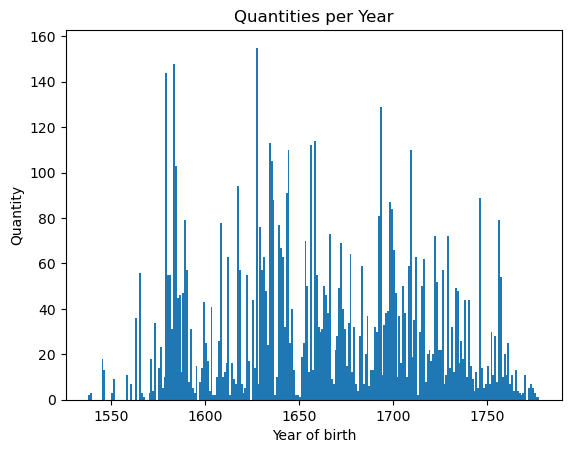

In [48]:
ddrc_stcn['year_birth'] = ddrc_stcn['year_birth'].astype(int)

# Calculate the bins for every 20 years
min_year = ddrc_stcn['year_birth'].min()
max_year = ddrc_stcn['year_birth'].max()
bin_width = 1
bins = range(min_year, max_year + bin_width, bin_width)

# Plotting the histogram
plt.hist(ddrc_stcn['year_birth'], bins=bins)

# Customize the plot
plt.title("Quantities per Year")
plt.xlabel("Year of birth")
plt.ylabel("Quantity")

# Show the plot
plt.show()